# color with hsv

HSL (hue, saturation, lightness) and HSV (hue, saturation, value) are alternative representations of the RGB color model. 

Code snippets and ideas from https://adamspannbauer.github.io/2018/03/02/app-icon-dominant-colors/



In [3]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from collections import Counter
import cv2
import numpy as np
import json
import glob
import matplotlib.pyplot as plt
import time
from sklearn.metrics import calinski_harabaz_score

In [57]:
def get_dominant_color(image, k, image_processing_size = (25, 25)):
    """
    takes an image as input
    returns the dominant color of the image as a list
    
    dominant color is found by running k means on the 
    pixels & returning the centroid of the largest cluster

    processing time is sped up by working with a smaller image; 
    this resizing can be done with the image_processing_size param 
    which takes a tuple of image dims as input


    """
    
    #reshape the image to be a list of pixels
    image = image.reshape((image.shape[0] * image.shape[1], 3))

    #cluster and assign labels to the pixels 

    clt = MiniBatchKMeans(n_clusters = k).fit(image)    
   
    
    clt_2 = MiniBatchKMeans(n_clusters = k-2).fit(image)
    clt_3 = MiniBatchKMeans(n_clusters = k-1).fit(image)
    clt_5 = MiniBatchKMeans(n_clusters = k+1).fit(image)
    clt_6 = MiniBatchKMeans(n_clusters = k+2).fit(image)
    clt_7 = MiniBatchKMeans(n_clusters = k+3).fit(image)
    clt_8 = MiniBatchKMeans(n_clusters = k+4).fit(image)
    clt_9 = MiniBatchKMeans(n_clusters = k+5).fit(image)
    clt_10 = MiniBatchKMeans(n_clusters = k+6).fit(image)
    clt_11 = MiniBatchKMeans(n_clusters = k+7).fit(image)
    clt_12 = MiniBatchKMeans(n_clusters = k+8).fit(image)
    
    clt_list = [clt, clt_2, clt_3, clt_5, clt_6, clt_7, clt_8, clt_9, clt_10,
                 clt_11,  clt_12]
    CH_score = []

    for model in clt_list:
        labels = model.labels_
        CH_score.append(calinski_harabaz_score(image, labels))
    
    plt.plot([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], CH_score)
    plt.xticks([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
    plt.title("Calinski Harabaz Scores for Different Values of K")
    plt.ylabel("Variance Ratio")
    plt.xlabel("K=")
    plt.show()
    
#     clt = MiniBatchKMeans(init='k-means++', n_clusters=k, batch_size=45,
#                       n_init=10, max_no_improvement=10, verbose=0).fit(image)
    
    labels = clt.predict(image)
    
    plt.scatter(image[:, 0], image[:, 1], c=labels, s=10)
    centers = clt.cluster_centers_
    plt.scatter(centers[:,0], centers[:, 1], c='black', s=70)
    plt.show()

    #count labels to find most popular
    label_counts = Counter(labels)

    #subset out most popular centroid
    dominant_color_1 = clt.cluster_centers_[label_counts.most_common(1)[0][0]]
    dominant_color_2 = clt.cluster_centers_[label_counts.most_common(2)[1][0]]
    dominant_color_3 = clt.cluster_centers_[label_counts.most_common(3)[2][0]]

    return list(dominant_color_1), list(dominant_color_2), list(dominant_color_3)

get_dominant_color function: 2.047s

Most prominent color:
red: 11  green:  15  blue:  18 
Hex:  #0b0f12

Second color:
red: 213  green:  15  blue:  192 
Hex:  #d5cdc0

Third color:
red: 44  green:  15  blue:  32 
Hex:  #2c2820


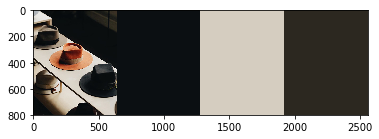

get_dominant_color function: 2.214s

Most prominent color:
red: 164  green:  153  blue:  133 
Hex:  #a49985

Second color:
red: 61  green:  153  blue:  38 
Hex:  #3d3126

Third color:
red: 212  green:  153  blue:  218 
Hex:  #d4d7da


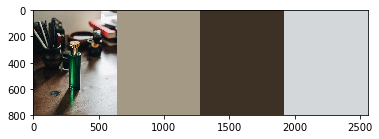

get_dominant_color function: 2.645s

Most prominent color:
red: 202  green:  208  blue:  212 
Hex:  #cad0d4

Second color:
red: 94  green:  208  blue:  114 
Hex:  #5e6c72

Third color:
red: 10  green:  208  blue:  29 
Hex:  #0a151d


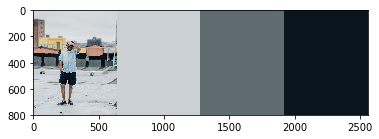

get_dominant_color function: 2.939s

Most prominent color:
red: 59  green:  84  blue:  87 
Hex:  #3b5457

Second color:
red: 25  green:  84  blue:  49 
Hex:  #192c31

Third color:
red: 175  green:  84  blue:  151 
Hex:  #afa997


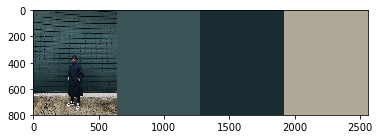

get_dominant_color function: 3.942s

Most prominent color:
red: 176  green:  89  blue:  58 
Hex:  #b0593a

Second color:
red: 62  green:  89  blue:  23 
Hex:  #3e1b17

Third color:
red: 188  green:  89  blue:  120 
Hex:  #bc8f78


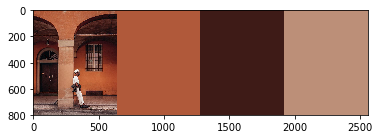

get_dominant_color function: 3.155s

Most prominent color:
red: 183  green:  183  blue:  171 
Hex:  #b7b7ab

Second color:
red: 161  green:  183  blue:  138 
Hex:  #a1998a

Third color:
red: 18  green:  183  blue:  26 
Hex:  #12141a


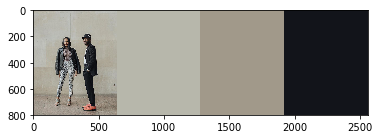

get_dominant_color function: 3.369s

Most prominent color:
red: 217  green:  197  blue:  179 
Hex:  #d9c5b3

Second color:
red: 162  green:  197  blue:  148 
Hex:  #a29a94

Third color:
red: 51  green:  197  blue:  59 
Hex:  #33383b


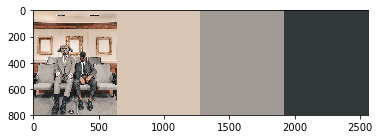

get_dominant_color function: 4.218s

Most prominent color:
red: 168  green:  163  blue:  149 
Hex:  #a8a395

Second color:
red: 121  green:  163  blue:  98 
Hex:  #797562

Third color:
red: 163  green:  163  blue:  65 
Hex:  #a38241


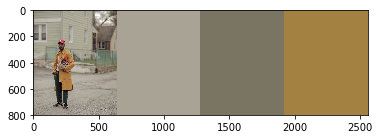

get_dominant_color function: 3.310s

Most prominent color:
red: 32  green:  46  blue:  57 
Hex:  #202e39

Second color:
red: 131  green:  46  blue:  58 
Hex:  #83413a

Third color:
red: 59  green:  46  blue:  29 
Hex:  #3b201d


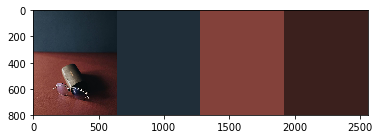

get_dominant_color function: 2.682s

Most prominent color:
red: 0  green:  0  blue:  0 
Hex:  #000000

Second color:
red: 173  green:  0  blue:  60 
Hex:  #ad873c

Third color:
red: 230  green:  0  blue:  133 
Hex:  #e6cc85


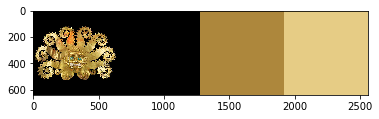

get_dominant_color function: 2.915s

Most prominent color:
red: 225  green:  224  blue:  224 
Hex:  #e1e0e0

Second color:
red: 22  green:  224  blue:  31 
Hex:  #16191f

Third color:
red: 153  green:  224  blue:  141 
Hex:  #99978d


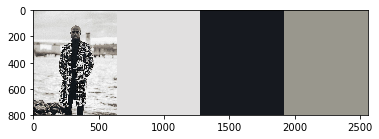

get_dominant_color function: 2.231s

Most prominent color:
red: 208  green:  204  blue:  193 
Hex:  #d0ccc1

Second color:
red: 133  green:  204  blue:  45 
Hex:  #854d2d

Third color:
red: 209  green:  204  blue:  113 
Hex:  #d19a71


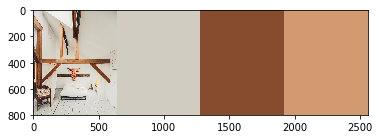

get_dominant_color function: 2.412s

Most prominent color:
red: 203  green:  204  blue:  198 
Hex:  #cbccc6

Second color:
red: 161  green:  204  blue:  80 
Hex:  #a17550

Third color:
red: 204  green:  204  blue:  142 
Hex:  #ccab8e


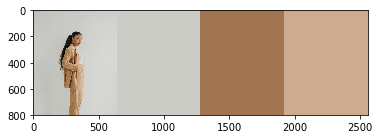

get_dominant_color function: 3.967s

Most prominent color:
red: 93  green:  89  blue:  75 
Hex:  #5d594b

Second color:
red: 156  green:  89  blue:  126 
Hex:  #9c8b7e

Third color:
red: 32  green:  89  blue:  26 
Hex:  #20291a


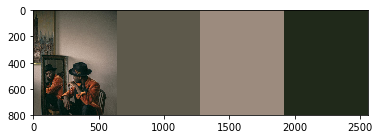

get_dominant_color function: 2.320s

Most prominent color:
red: 62  green:  69  blue:  72 
Hex:  #3e4548

Second color:
red: 88  green:  69  blue:  78 
Hex:  #58574e

Third color:
red: 195  green:  69  blue:  152 
Hex:  #c3ad98


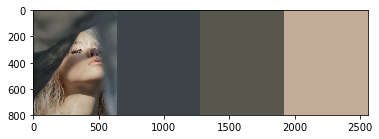

get_dominant_color function: 2.289s

Most prominent color:
red: 176  green:  90  blue:  59 
Hex:  #b05a3b

Second color:
red: 64  green:  90  blue:  24 
Hex:  #401c18

Third color:
red: 187  green:  90  blue:  122 
Hex:  #bb8f7a


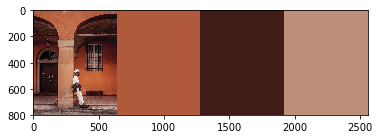

get_dominant_color function: 2.409s

Most prominent color:
red: 19  green:  21  blue:  30 
Hex:  #13151e

Second color:
red: 81  green:  21  blue:  31 
Hex:  #51221f

Third color:
red: 49  green:  21  blue:  28 
Hex:  #31181c


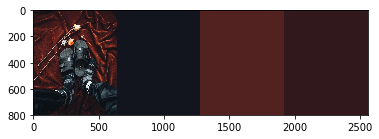

get_dominant_color function: 2.723s

Most prominent color:
red: 120  green:  105  blue:  99 
Hex:  #786963

Second color:
red: 180  green:  105  blue:  154 
Hex:  #b4a39a

Third color:
red: 120  green:  105  blue:  118 
Hex:  #787076


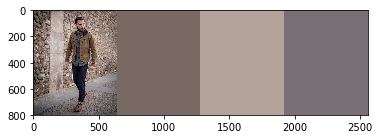

get_dominant_color function: 2.149s

Most prominent color:
red: 170  green:  177  blue:  168 
Hex:  #aab1a8

Second color:
red: 133  green:  177  blue:  106 
Hex:  #857f6a

Third color:
red: 41  green:  177  blue:  31 
Hex:  #292b1f


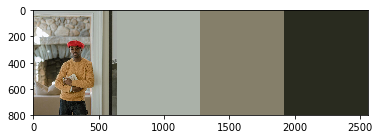

get_dominant_color function: 2.457s

Most prominent color:
red: 104  green:  126  blue:  139 
Hex:  #687e8b

Second color:
red: 128  green:  126  blue:  162 
Hex:  #8099a2

Third color:
red: 165  green:  126  blue:  180 
Hex:  #a5b7b4


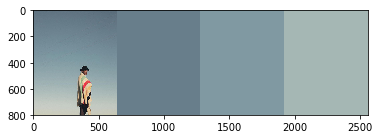

get_dominant_color function: 2.749s

Most prominent color:
red: 222  green:  222  blue:  213 
Hex:  #deded5

Second color:
red: 162  green:  222  blue:  146 
Hex:  #a29d92

Third color:
red: 192  green:  222  blue:  130 
Hex:  #c09f82


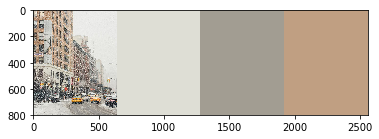

get_dominant_color function: 2.183s

Most prominent color:
red: 204  green:  204  blue:  197 
Hex:  #ccccc5

Second color:
red: 123  green:  204  blue:  112 
Hex:  #7b7670

Third color:
red: 46  green:  204  blue:  57 
Hex:  #2e3339


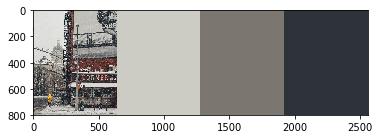

get_dominant_color function: 1.873s

Most prominent color:
red: 17  green:  22  blue:  25 
Hex:  #111619

Second color:
red: 25  green:  22  blue:  32 
Hex:  #191b20

Third color:
red: 17  green:  22  blue:  21 
Hex:  #111215


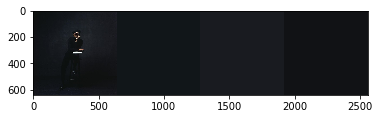

In [45]:
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--imagePath", required=True,
# 	help="Path to image to find dominant color of")
# ap.add_argument("-k", "--clusters", default=3, type=int,
# 	help="Number of clusters to use in kmeans when finding dominant color")
# args = vars(ap.parse_args())


for i in glob.glob('./fohrtestimages/*'):
    #read in image of interest
    bgr_image = cv2.imread(i)
    #convert to HSV; this is a better representation of how we see color
    hsv_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2HSV)
    
    #extract 3 most dominant colors
    # (aka the centroid of the most popular k means cluster)
    start=time.time()
    dom_color_1, dom_color_2, dom_color_3 = get_dominant_color(hsv_image, k=5)
    print('get_dominant_color function: {:.3f}s'.format(time.time()-start))
    
    #create a square showing dominant color of equal size to input image
    dom_color_1_hsv = np.full(bgr_image.shape, dom_color_1, dtype='uint8')
    #convert to bgr color space for display
    dom_color_1_rgb = cv2.cvtColor(dom_color_1_hsv, cv2.COLOR_HSV2RGB)
    
    #create a square showing dominant color of equal size to input image
    dom_color_2_hsv = np.full(bgr_image.shape, dom_color_2, dtype='uint8')
    #convert to bgr color space for display
    dom_color_2_rgb = cv2.cvtColor(dom_color_2_hsv, cv2.COLOR_HSV2RGB)
    
    #create a square showing dominant color of equal size to input image
    dom_color_3_hsv = np.full(bgr_image.shape, dom_color_3, dtype='uint8')
    #convert to bgr color space for display
    dom_color_3_rgb = cv2.cvtColor(dom_color_3_hsv, cv2.COLOR_HSV2RGB)
    
    #concat input image and dom color square side by side for display
    output_image = np.hstack((bgr_image[:,:,::-1], dom_color_1_rgb, dom_color_2_rgb, dom_color_3_rgb))
    
    #show results to screen
    print('\nMost prominent color:\nred:', dom_color_1_rgb[0][0][0], ' green: ', dom_color_1_rgb[0][0][1],
          ' blue: ', dom_color_1_rgb[0][0][2], '\nHex: ', '#%02x%02x%02x' % (dom_color_1_rgb[0][0][0], 
                                                                             dom_color_1_rgb[0][0][1], 
                                                                             dom_color_1_rgb[0][0][2]))
    
    print('\nSecond color:\nred:', dom_color_2_rgb[0][0][0], ' green: ', dom_color_1_rgb[0][0][1],
          ' blue: ', dom_color_2_rgb[0][0][2], '\nHex: ', '#%02x%02x%02x' % (dom_color_2_rgb[0][0][0], 
                                                                             dom_color_2_rgb[0][0][1],
                                                                             dom_color_2_rgb[0][0][2]))
    
    print('\nThird color:\nred:', dom_color_3_rgb[0][0][0], ' green: ', dom_color_1_rgb[0][0][1],
          ' blue: ', dom_color_3_rgb[0][0][2], '\nHex: ', '#%02x%02x%02x' % (dom_color_3_rgb[0][0][0], 
                                                                             dom_color_3_rgb[0][0][1], 
                                                                             dom_color_3_rgb[0][0][2]))    
    plt.imshow(output_image)
    plt.show()

Mini Batch KMeans for time: 

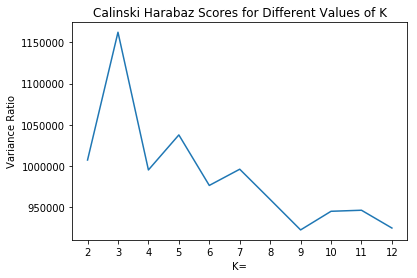

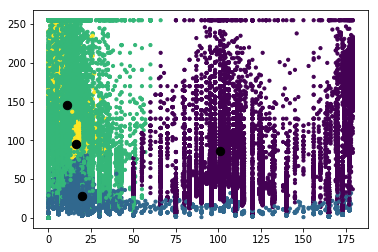

get_dominant_color function:  31 3

Most prominent color:
red: 11  green:  15  blue:  18 
Hex:  #0b0f12

Second color:
red: 211  green:  15  blue:  188 
Hex:  #d3cabc

Third color:
red: 46  green:  15  blue:  28 
Hex:  #2e261c


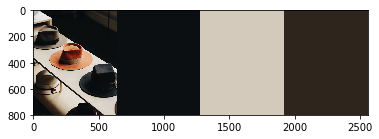

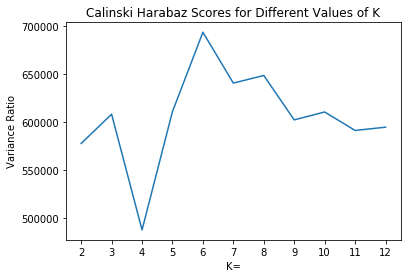

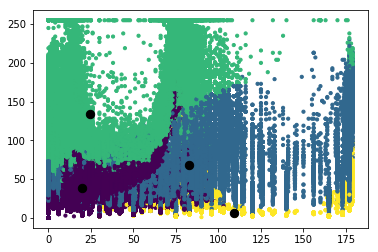

get_dominant_color function:  32 3

Most prominent color:
red: 171  green:  161  blue:  145 
Hex:  #aba191

Second color:
red: 71  green:  161  blue:  33 
Hex:  #473f21

Third color:
red: 20  green:  161  blue:  26 
Hex:  #141c1a


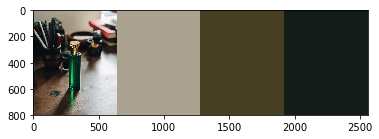

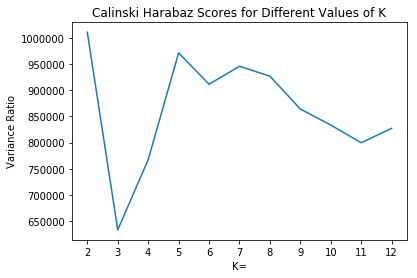

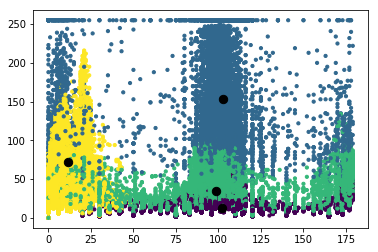

get_dominant_color function:  32 3

Most prominent color:
red: 202  green:  208  blue:  213 
Hex:  #cad0d5

Second color:
red: 173  green:  208  blue:  124 
Hex:  #ad8e7c

Third color:
red: 104  green:  208  blue:  121 
Hex:  #687479


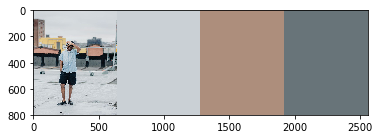

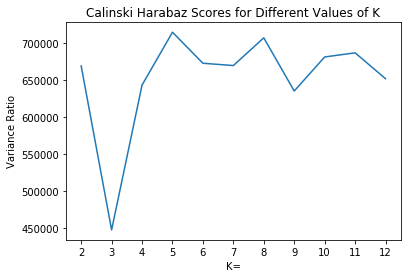

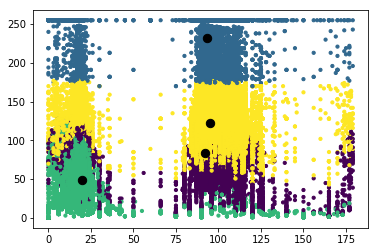

get_dominant_color function:  42 3

Most prominent color:
red: 58  green:  85  blue:  87 
Hex:  #3a5557

Second color:
red: 24  green:  85  blue:  47 
Hex:  #182b2f

Third color:
red: 147  green:  85  blue:  118 
Hex:  #938876


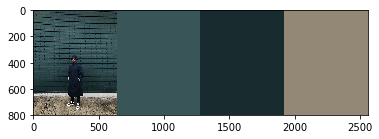

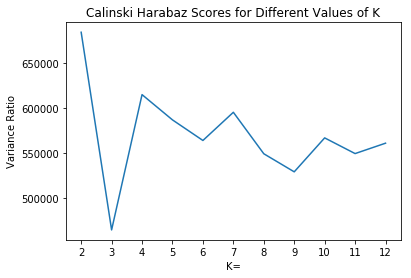

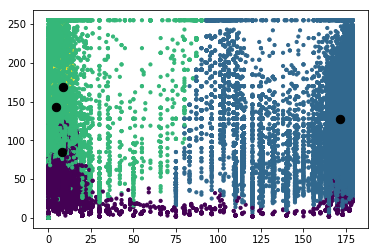

get_dominant_color function:  31 3

Most prominent color:
red: 177  green:  91  blue:  60 
Hex:  #b15b3c

Second color:
red: 70  green:  91  blue:  30 
Hex:  #46231e

Third color:
red: 163  green:  91  blue:  109 
Hex:  #a37b6d


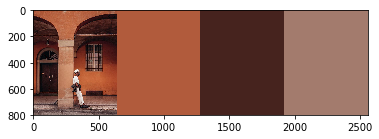

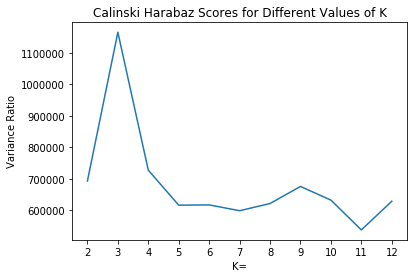

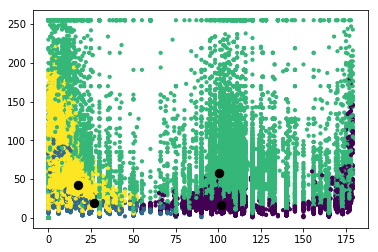

get_dominant_color function:  34 3

Most prominent color:
red: 180  green:  178  blue:  167 
Hex:  #b4b2a7

Second color:
red: 155  green:  178  blue:  129 
Hex:  #9b8f81

Third color:
red: 31  green:  178  blue:  40 
Hex:  #1f2528


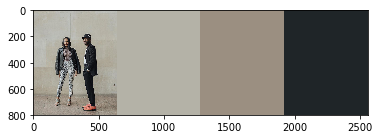

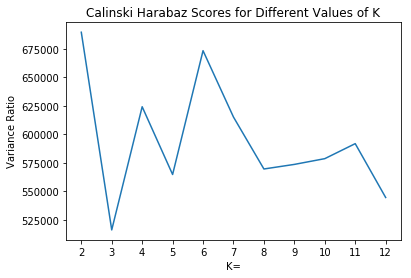

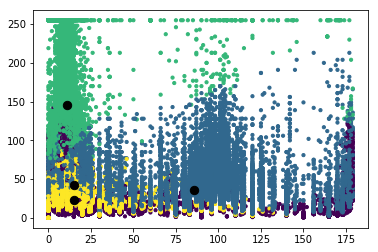

get_dominant_color function:  27 3

Most prominent color:
red: 213  green:  194  blue:  177 
Hex:  #d5c2b1

Second color:
red: 152  green:  194  blue:  138 
Hex:  #98918a

Third color:
red: 47  green:  194  blue:  53 
Hex:  #2f3735


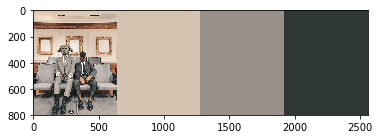

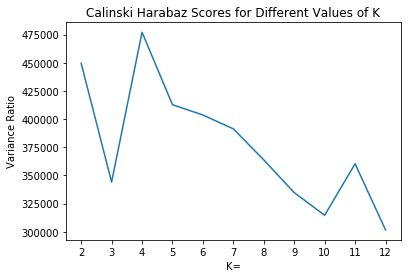

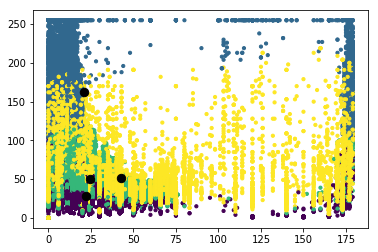

get_dominant_color function:  30 3

Most prominent color:
red: 167  green:  162  blue:  148 
Hex:  #a7a294

Second color:
red: 120  green:  162  blue:  96 
Hex:  #787360

Third color:
red: 151  green:  162  blue:  55 
Hex:  #977a37


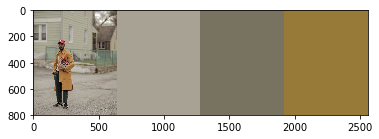

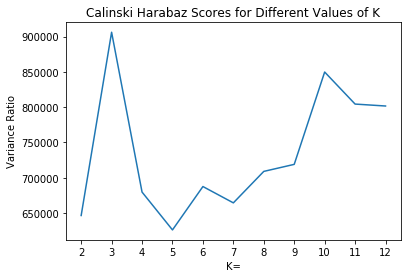

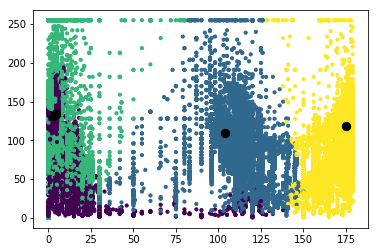

get_dominant_color function:  28 3

Most prominent color:
red: 32  green:  46  blue:  57 
Hex:  #202e39

Second color:
red: 135  green:  46  blue:  64 
Hex:  #874940

Third color:
red: 63  green:  46  blue:  30 
Hex:  #3f201e


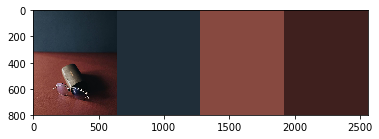

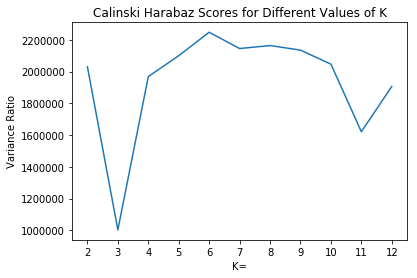

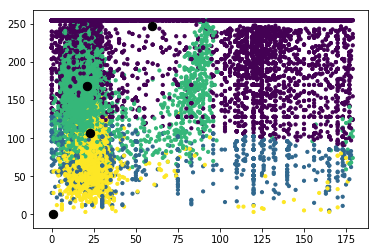

get_dominant_color function:  22 3

Most prominent color:
red: 0  green:  0  blue:  0 
Hex:  #000000

Second color:
red: 174  green:  0  blue:  59 
Hex:  #ae873b

Third color:
red: 232  green:  0  blue:  134 
Hex:  #e8ce86


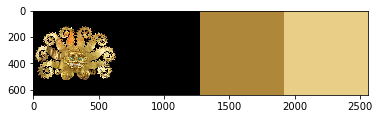

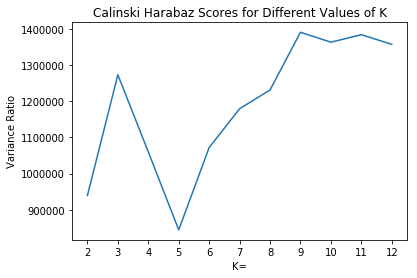

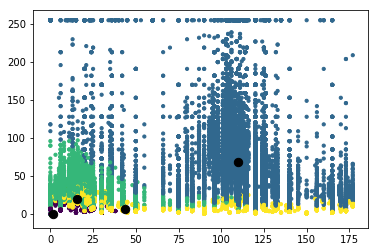

get_dominant_color function:  30 3

Most prominent color:
red: 229  green:  229  blue:  229 
Hex:  #e5e5e5

Second color:
red: 203  green:  229  blue:  201 
Hex:  #cbcec9

Third color:
red: 24  green:  229  blue:  33 
Hex:  #181b21


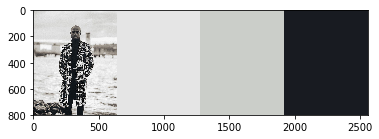

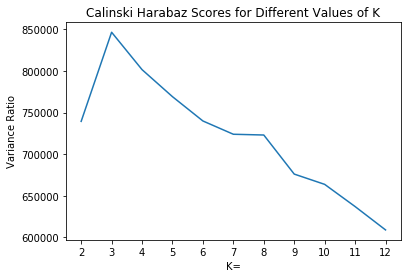

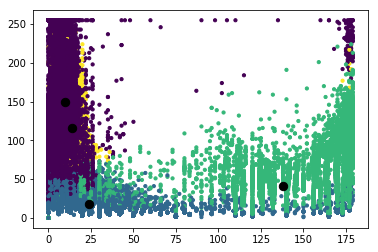

get_dominant_color function:  33 3

Most prominent color:
red: 208  green:  205  blue:  193 
Hex:  #d0cdc1

Second color:
red: 110  green:  205  blue:  45 
Hex:  #6e402d

Third color:
red: 206  green:  205  blue:  112 
Hex:  #ce9870


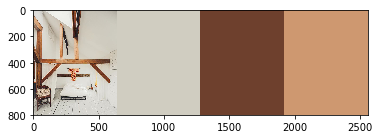

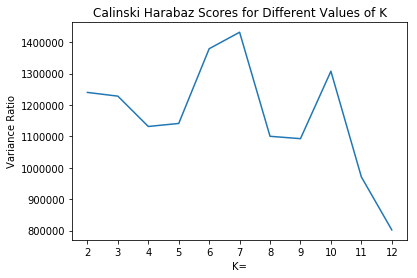

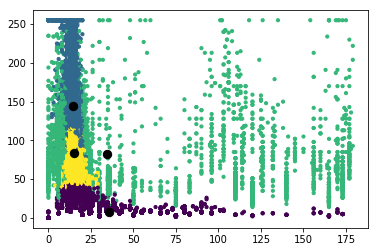

get_dominant_color function:  30 3

Most prominent color:
red: 203  green:  204  blue:  198 
Hex:  #cbccc6

Second color:
red: 148  green:  204  blue:  64 
Hex:  #946740

Third color:
red: 197  green:  204  blue:  132 
Hex:  #c5a284


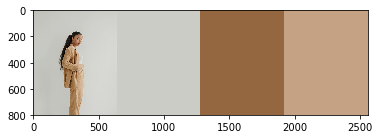

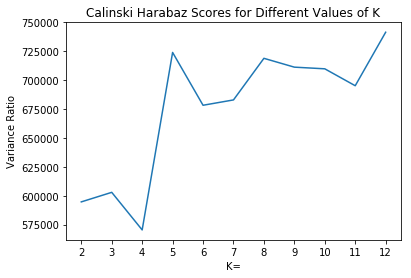

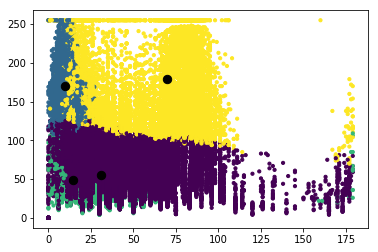

get_dominant_color function:  30 3

Most prominent color:
red: 77  green:  77  blue:  60 
Hex:  #4d4d3c

Second color:
red: 148  green:  77  blue:  120 
Hex:  #948578

Third color:
red: 8  green:  77  blue:  13 
Hex:  #081b0d


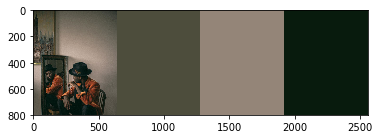

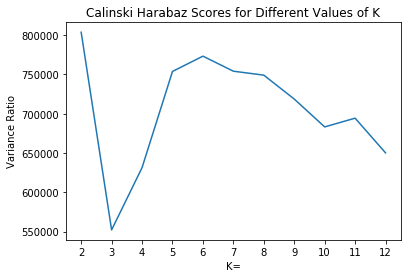

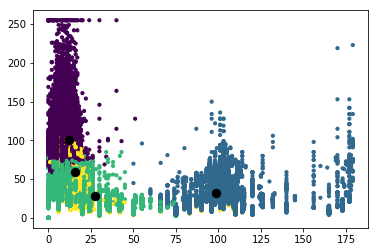

get_dominant_color function:  33 3

Most prominent color:
red: 63  green:  69  blue:  72 
Hex:  #3f4548

Second color:
red: 90  green:  69  blue:  80 
Hex:  #5a5950

Third color:
red: 183  green:  69  blue:  140 
Hex:  #b7a18c


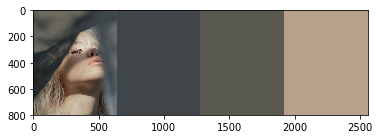

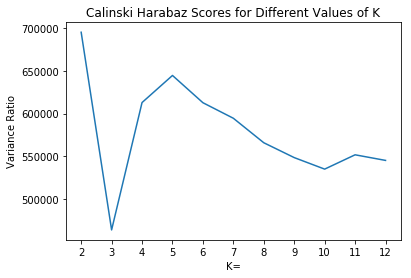

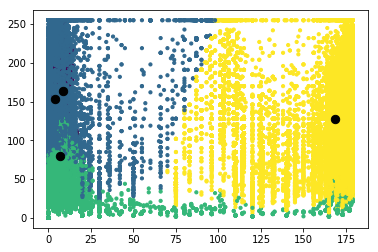

get_dominant_color function:  31 3

Most prominent color:
red: 181  green:  96  blue:  65 
Hex:  #b56041

Second color:
red: 66  green:  96  blue:  26 
Hex:  #421e1a

Third color:
red: 150  green:  96  blue:  103 
Hex:  #967067


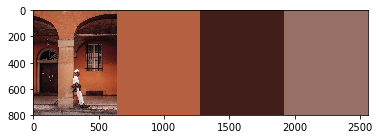

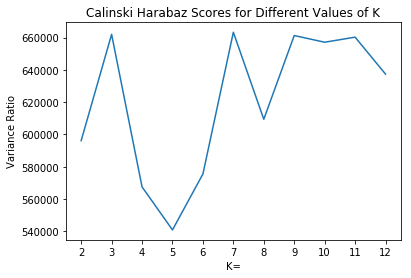

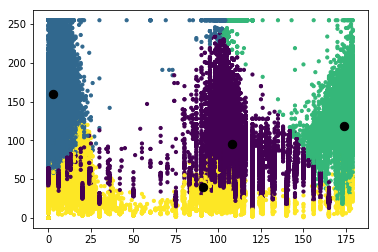

get_dominant_color function:  30 3

Most prominent color:
red: 19  green:  24  blue:  31 
Hex:  #13181f

Second color:
red: 46  green:  24  blue:  28 
Hex:  #2e181c

Third color:
red: 84  green:  24  blue:  31 
Hex:  #54231f


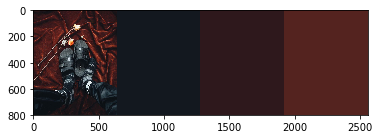

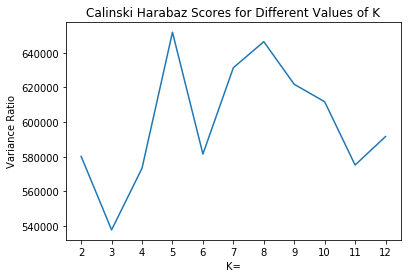

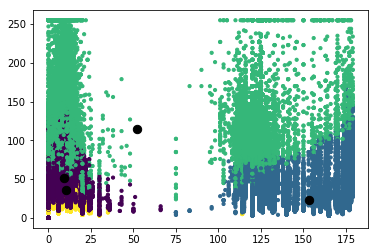

get_dominant_color function:  32 3

Most prominent color:
red: 115  green:  98  blue:  92 
Hex:  #73625c

Second color:
red: 181  green:  98  blue:  155 
Hex:  #b5a39b

Third color:
red: 112  green:  98  blue:  111 
Hex:  #70666f


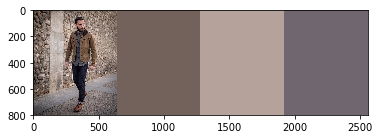

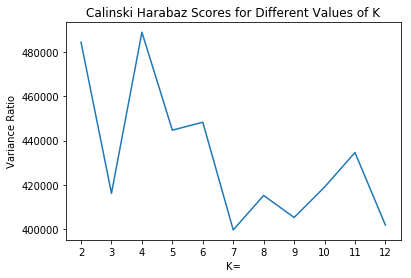

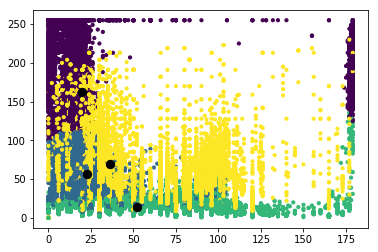

get_dominant_color function:  29 3

Most prominent color:
red: 168  green:  175  blue:  166 
Hex:  #a8afa6

Second color:
red: 134  green:  175  blue:  104 
Hex:  #867e68

Third color:
red: 145  green:  175  blue:  52 
Hex:  #916f34


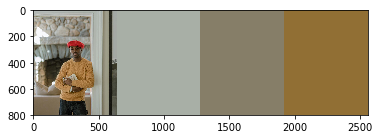

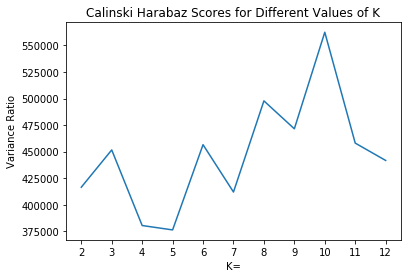

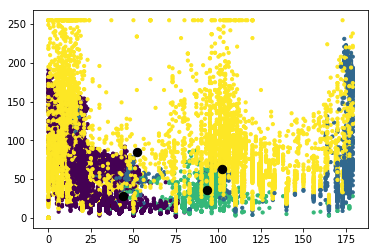

get_dominant_color function:  33 3

Most prominent color:
red: 107  green:  128  blue:  142 
Hex:  #6b808e

Second color:
red: 150  green:  128  blue:  174 
Hex:  #96abae

Third color:
red: 192  green:  128  blue:  179 
Hex:  #c0cab3


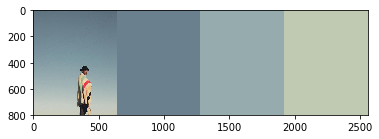

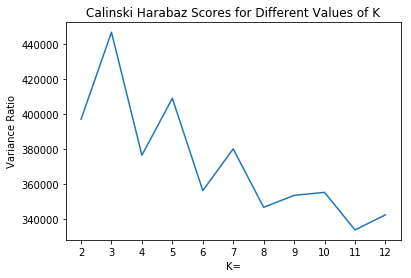

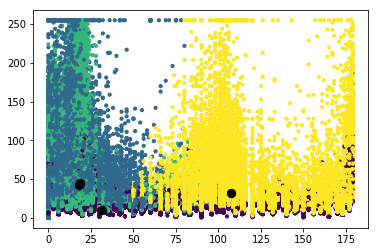

get_dominant_color function:  31 3

Most prominent color:
red: 221  green:  222  blue:  213 
Hex:  #ddded5

Second color:
red: 175  green:  222  blue:  146 
Hex:  #afa392

Third color:
red: 100  green:  222  blue:  82 
Hex:  #645d52


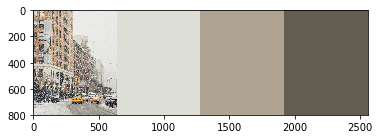

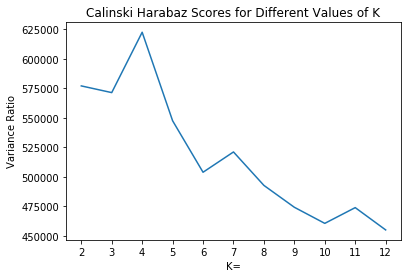

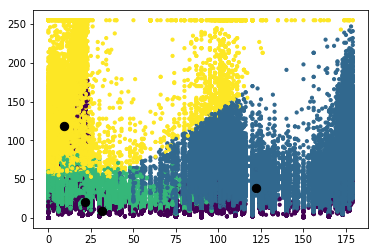

get_dominant_color function:  35 3

Most prominent color:
red: 201  green:  202  blue:  195 
Hex:  #c9cac3

Second color:
red: 59  green:  202  blue:  69 
Hex:  #3b3a45

Third color:
red: 114  green:  202  blue:  105 
Hex:  #726f69


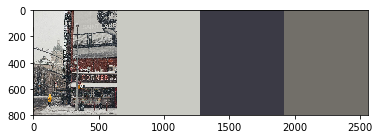

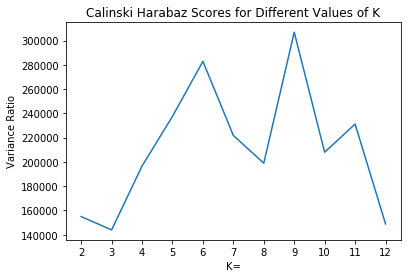

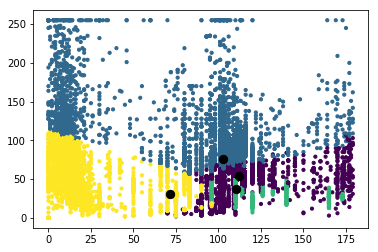

get_dominant_color function:  22 3

Most prominent color:
red: 17  green:  22  blue:  25 
Hex:  #111619

Second color:
red: 25  green:  22  blue:  32 
Hex:  #191b20

Third color:
red: 17  green:  22  blue:  20 
Hex:  #111214


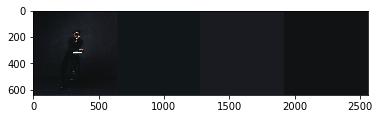

In [58]:
for i in glob.glob('./fohrtestimages/*'):
    #read in image of interest
    bgr_image = cv2.imread(i)
    #convert to HSV; this is a better representation of how we see color
    hsv_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2HSV)
    
    #extract 3 most dominant colors
    # (aka the centroid of the most popular k means cluster)
    start=time.time()
    dom_color_1, dom_color_2, dom_color_3 = get_dominant_color(hsv_image, k=4)
    print('get_dominant_color function: ', round(time.time()-start), 3)
    
    #create a square showing dominant color of equal size to input image
    dom_color_1_hsv = np.full(bgr_image.shape, dom_color_1, dtype='uint8')
    #convert to bgr color space for display
    dom_color_1_rgb = cv2.cvtColor(dom_color_1_hsv, cv2.COLOR_HSV2RGB)
    
    #create a square showing dominant color of equal size to input image
    dom_color_2_hsv = np.full(bgr_image.shape, dom_color_2, dtype='uint8')
    #convert to bgr color space for display
    dom_color_2_rgb = cv2.cvtColor(dom_color_2_hsv, cv2.COLOR_HSV2RGB)
    
    #create a square showing dominant color of equal size to input image
    dom_color_3_hsv = np.full(bgr_image.shape, dom_color_3, dtype='uint8')
    #convert to bgr color space for display
    dom_color_3_rgb = cv2.cvtColor(dom_color_3_hsv, cv2.COLOR_HSV2RGB)
    
    #concat input image and dom color square side by side for display
    output_image = np.hstack((bgr_image[:,:,::-1], dom_color_1_rgb, dom_color_2_rgb, dom_color_3_rgb))
    
    #show results to screen
    print('\nMost prominent color:\nred:', dom_color_1_rgb[0][0][0], ' green: ', dom_color_1_rgb[0][0][1],
          ' blue: ', dom_color_1_rgb[0][0][2], '\nHex: ', '#%02x%02x%02x' % (dom_color_1_rgb[0][0][0], 
                                                                             dom_color_1_rgb[0][0][1], 
                                                                             dom_color_1_rgb[0][0][2]))
    
    print('\nSecond color:\nred:', dom_color_2_rgb[0][0][0], ' green: ', dom_color_1_rgb[0][0][1],
          ' blue: ', dom_color_2_rgb[0][0][2], '\nHex: ', '#%02x%02x%02x' % (dom_color_2_rgb[0][0][0], 
                                                                             dom_color_2_rgb[0][0][1],
                                                                             dom_color_2_rgb[0][0][2]))
    
    print('\nThird color:\nred:', dom_color_3_rgb[0][0][0], ' green: ', dom_color_1_rgb[0][0][1],
          ' blue: ', dom_color_3_rgb[0][0][2], '\nHex: ', '#%02x%02x%02x' % (dom_color_3_rgb[0][0][0], 
                                                                             dom_color_3_rgb[0][0][1], 
                                                                             dom_color_3_rgb[0][0][2]))    
    plt.imshow(output_image)
    plt.show()

In [49]:
dom_color = [94, 98, 88]
print('#%02x%02x%02x' % (int(dom_color[2]), int(dom_color[1]), int(dom_color[0])))

#58625e


Test of getting the Hue Saturation and Value

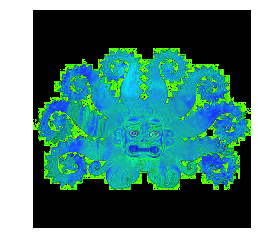

In [50]:
image = cv2.imread('./fohrtestimages/fohrimage.jpg')
image = cv2.resize(image,(224,224))
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
 
# show our image
plt.figure()
plt.axis("off")
plt.imshow(image)

In [51]:
image.shape

(224, 224, 3)

In [52]:
oriimg = cv2.imread('./fohrtestimages/fohrimage3.jpg',cv2.COLORMAP_HSV)
img = cv2.resize(oriimg,(50,50))

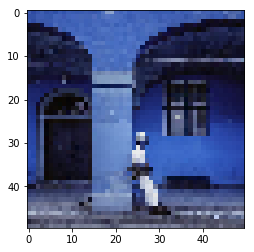

In [53]:
plt.imshow(img)

In [54]:

img = img.reshape((img.shape[0] * img.shape[1], 3))

    #cluster and assign labels to the pixels 
clt = KMeans(n_clusters = 35)
labels = clt.fit_predict(img)

    #count labels to find most popular
label_counts = Counter(labels)

    #subset out most popular centroid
dominant_color_1 = clt.cluster_centers_[label_counts.most_common(1)[0][0]]
dominant_color_2 = clt.cluster_centers_[label_counts.most_common(2)[1][0]]
dominant_color_3 = clt.cluster_centers_[label_counts.most_common(3)[2][0]]


In [55]:
dominant_color_1

array([15.43457944, 14.47196262, 29.48130841])

In [56]:
label_counts.most_common(3)[1][0]

13

In [57]:
hex1 = '#%02x%02x%02x' % (dom_color_1_rgb[0][0][0], dom_color_1_rgb[0][0][1], dom_color_1_rgb[0][0][2])
hex2 = '#%02x%02x%02x' % (dom_color_2_rgb[0][0][0], dom_color_2_rgb[0][0][1], dom_color_2_rgb[0][0][2])
hex3 = '#%02x%02x%02x' % (dom_color_3_rgb[0][0][0], dom_color_3_rgb[0][0][1], dom_color_3_rgb[0][0][2])

In [58]:
color_dict = {'first_color':{'red': int(dom_color_1_rgb[0][0][0]), 'green': int(dom_color_1_rgb[0][0][1]), 'blue': int(dom_color_1_rgb[0][0][2]), 
'hex': hex1}, 'second_color':{'red': int(dom_color_2_rgb[0][0][0]), 'green':int(dom_color_1_rgb[0][0][1]), 'blue: ': int(dom_color_2_rgb[0][0][2]), 'hex': hex2}, 
              'third_color':{'red': int(dom_color_3_rgb[0][0][0]), 'green': int(dom_color_1_rgb[0][0][1]), 'blue': int(dom_color_3_rgb[0][0][2]), 
'hex': hex3}}

In [59]:
type(color_dict['first_color']['hex'])

str

In [60]:
print(json.dumps(color_dict))

{"first_color": {"red": 17, "green": 22, "blue": 25, "hex": "#111619"}, "second_color": {"red": 23, "green": 22, "blue: ": 29, "hex": "#17181d"}, "third_color": {"red": 15, "green": 22, "blue": 16, "hex": "#0f1210"}}
